# What Makes a Game Successful?

As an analyst at Ice, an online store that sells video games all over the world. The job is to analyze data obtain in 2016 and plan a campaign for 2017. 

##  Introduction
Presented is an analysis of video game data based on expert reviews, genres, age rating, platforms, and historical data on game sales. 

###  Goal:
This report will focus on analyzing different factors and hope to identify patterns that determine whether a game succeed or not. This will allow us to spot potential big winners and plan advertising campaigns.


### Stages:
This project will consist of the following stages:

1. Introduction
2. Data Initialization
3. Data Preprocessing
    1. Replace column names
    2. Data types
    3. Missing values
    4. Total sales
4. Game data analysis
    1. Years
    2. Platform
    3. Total Sales
    4. Reviews
    5. Genre
5. User profile based on region
6. Test Statistical Hypotheses 
    1. The average user ratings of the Xbox One and PC platforms is the same.
    2. The average user ratings for the Action and Sports genres is different.
7. Conclusion
         

## Data Initialization

Importing all necessary libraries for this project.

In [20]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import functools as ft
import seaborn as sns

Import the dataset.

In [21]:
# Importing the dataset

game = pd.read_csv('/datasets/games.csv')

We will take a look at the dataset and determine what needs to be done. 

In [22]:
#general information of our dataframe

game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataframe consist of the following categories:

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales` (North American sales in USD million)
- `EU_sales` (sales in Europe in USD million)
- `JP_sales` (sales in Japan in USD million)
- `Other_sales` (sales in other countries in USD million)
- `Critic_Score` (maximum of 100)
- `User_Score` (maximum of 10)
- `Rating` (ESRB)

In [23]:
# get a sample of the df

game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- One problem that we immediately noticed is the inconsistency in column names, some are capitalized and some are not. We will make them all lowercase to be consistent. 

- The **name** column has 2 missing values, we will check later and decide what to do with it. 

- The **Year of Release** is a float type column, we should change it to integers. In addition, there are >250 missing values in this column, we will need to check later and decide whether to fill it manually or by other factors or remove them.

- **Genre** also has 2 missing values, likely associated with the missing names. We will check later.

- **Critic Score** has missing values.

- **User_Score** will probably need to convert to float, unless we want specify what each value means. We will fill the missing values.

- **Rating**, missing values. We will look at the column more to determine how to fill those missing values.

After preprocessing the data, a new column for 'total_sales' will be added for each game.

## Data Preprocessing

### lowercase

We will convert all column names to lowercase.

In [24]:
#making column names lowercase
game.columns = game.columns.str.lower()

#to check
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 'name' column

In [25]:
#check a sample of this column
game['name'].head(10)

#lets look at the two missing values

game.loc[game['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


No way of knowing what the names of those games are, despite they have entries in other columns, so we should remove them. but let's wait and see these are the same missing values in the 'genre' as well.

### year of release

Let's look at the **'year of release** column. Since there is only a small amount of data missing (~270), it would be better to drop them. We should also convert the column to integer. 

In [26]:
#to drop all of the missing values

game = game.dropna(subset = ['year_of_release'])

#checking
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [27]:
#Change data type to integer

game['year_of_release'] = game['year_of_release'].astype('int')

#check

game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Genre column

Now, let's look at the **genre** column. We can find the two missing values, if they have a name, we can potential fill the missing genre by referencing to this game on other platform. 

In [28]:
# get the two rows

game.loc[game['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Still the same 659 and 14244, we will remove them. As there is no way of knowing the name nor the genre of these two games.

In [29]:
#drop those two
game = game.dropna(subset = ['genre'])

#checking
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Critic score column

Next, let's look at the **'critic_score'** column. since there are a lot of missing values (>50% of the dataset), we cannot simply remove them. We can attend to fill it with the global median, however, it would not be very representative of the dataset. We fill the missing values with an unreal value, this will save the original properties of our data. 

In [30]:
#filling critic score

med_score_1 = game.groupby(['platform','genre'])['critic_score'].median()

def fill_score_1(row):
    if pd.isna(row['critic_score']):
        return med_score_1.get((row['platform'], row['genre']))
    else:
        return row['critic_score']

game['critic_score'] = game.apply(fill_score_1, axis = 1)

#checking

game.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     15333 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Noticed that this method did not fill all of the missing values, so we will attempt to fill with genre only. 

In [31]:
#filling critic score

med_score = game.groupby('genre')['critic_score'].median()

def fill_score(row):
    if pd.isna(row['critic_score']):
        return med_score.get(row['genre'])
    else:
        return row['critic_score']

game['critic_score'] = game.apply(fill_score, axis = 1)

#checking

game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### User_score column

Next we have the **'user_score'** column, lets first take a look at what the score look like.

In [32]:
#using value_counts()

game['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
0.6       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

We see that tbd or 'To Be Determined' has appeared 2424 times, it means that an user_score was not available at the time of data collection. We can attempt to replace these with mean/median values, but first we will need to treat them as missing values. 

In [33]:
#replace 'tbd' with NaN value.

game['user_score'] = game['user_score'].replace({'tbd' : np.nan})

#change it to float type

game['user_score'] = game['user_score'].astype('float')

#check

game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Now that our 'tbd' are NaN, we can proceed to fill those 'missing values' the same way as we did for 'critic score'.

In [34]:
#filling user score

score = game.groupby(['platform','genre'])['user_score'].mean()

def fill_score_user(row):
    if pd.isna(row['user_score']):
        return score.get((row['platform'], row['genre']))
    else:
        return row['user_score']

game['user_score'] = game.apply(fill_score_user, axis = 1)

#checking

game.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       15340 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Same thing happened with user_score, we will fill with genre only.

In [35]:
#filling user score

score_1 = game.groupby('genre')['user_score'].mean()

def fill_score_user_1(row):
    if pd.isna(row['user_score']):
        return score_1.get(row['genre'])
    else:
        return row['user_score']

game['user_score'] = game.apply(fill_score_user_1, axis = 1)

#checking

game.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Rating column

Now we need to look at the **'rating'** column.

In [36]:
#checking all ratings in this column

game['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We see that there missing values in the rating. Let's look at those missing values.

In [37]:
game.loc[game['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.407677,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.674664,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,69.0,7.209083,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,72.0,7.107555,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,65.5,6.708511,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.901550,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.291463,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.775000,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.686000,NaN


We see that most games with a missing rating appeared to have missing critic_score and user_score as well. 

In [38]:
#filling by using mode.

rating = game.groupby('genre')['rating'].agg(pd.Series.mode)

def fill_rating(row):
    if pd.isna(row['rating']):
        return rating.get(row['genre'])
    else:
        return row['rating']
    
game['rating'] = game.apply(fill_rating, axis = 1)

game.info()
game.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.407677,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.674664,T


All missing values have been filled. Now we will calculate total sales and add a new column to our dataframe.

### Total Sale

In [39]:
#add all sales and create a new column.

game['total_sale'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

#check


game.info()
game.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sale       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.407677,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.674664,T,31.38


In this preprocessing step, we have successfully making all column names lowercase, changed the datatype, filled all missing values and added a new column that indicates the total sale of a game. 

## Game Data Analysis

### Games released by year

We will first look at how many games have been released in a given year. We will do this by grouping the games by year_of_release. 

In [40]:
#groupby

game_by_year = game.groupby('year_of_release')['name'].count()

game_by_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Let's plot a bar chart for this data. 

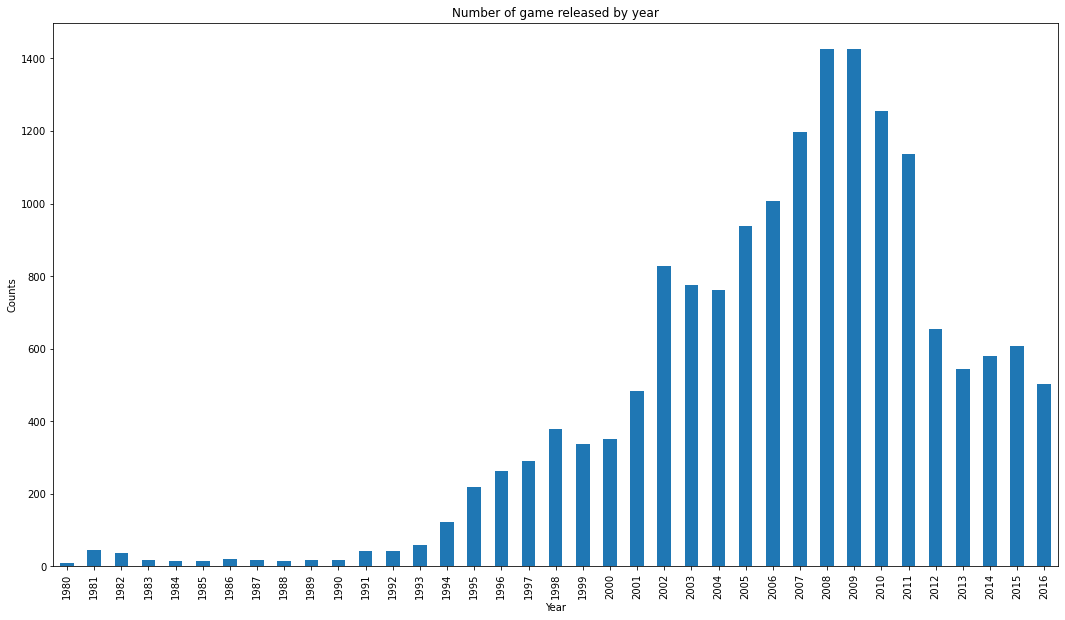

In [41]:
#bar chart

game_by_year.plot(kind = 'bar', figsize = (18,10))

plt.title('Number of game released by year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()


As suggested by the bar graph, the number of games released prior 1994 was <200. Whereas 1995-2001 were <600. We see around 800 - 1000 games gets released from 2002-2007. While the most amount (>1400) of games released from 2008-2009. 2008 to present (2016), it varies from <600 to >1200.

### Platform data

Let's look at how sales varied across platforms. 

In [42]:
#groupby total_sales by platform.

platform_sale = game.groupby('platform')['total_sale'].sum().sort_values(ascending = False)

platform_sale

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sale, dtype: float64

It appears that PS2 is leading in sale, followed by Xbox360, PS3, Wii, DS and PS. We will focus on these platforms and plot a bar plot showing the total sales in each year. 

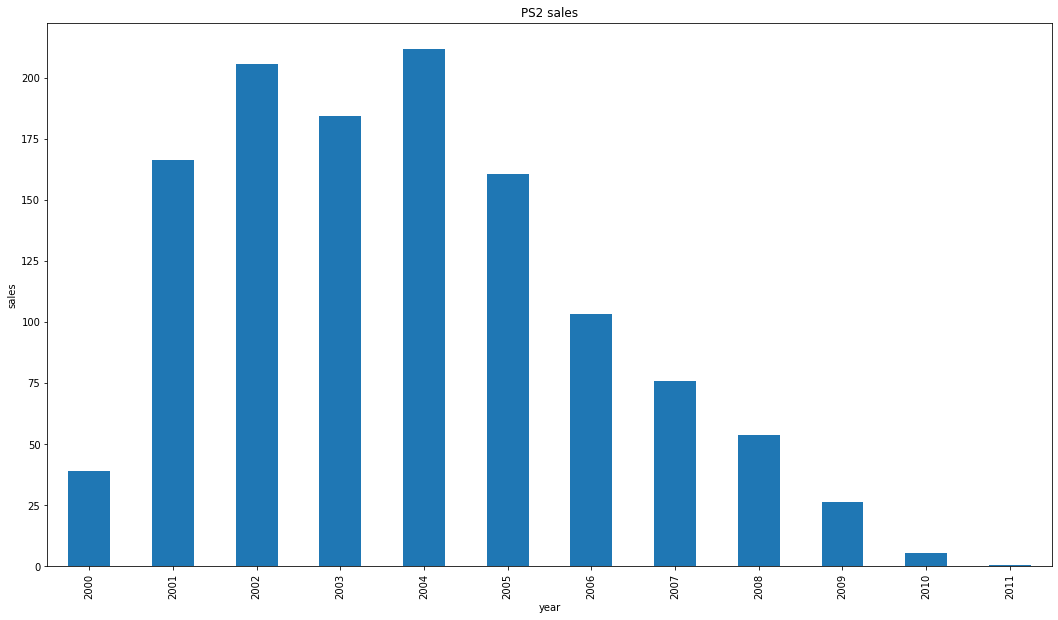

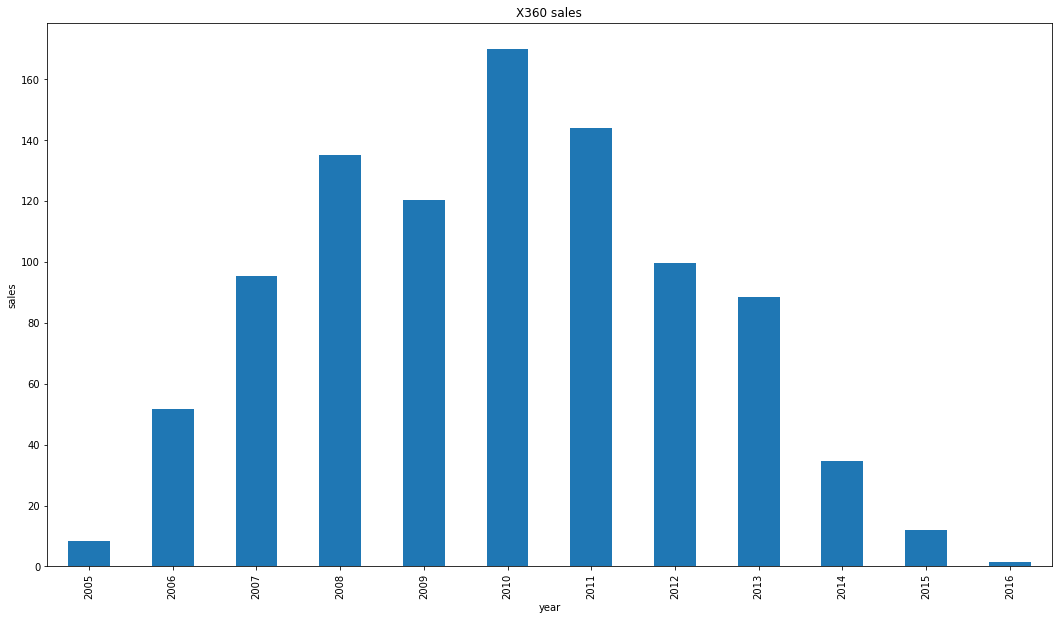

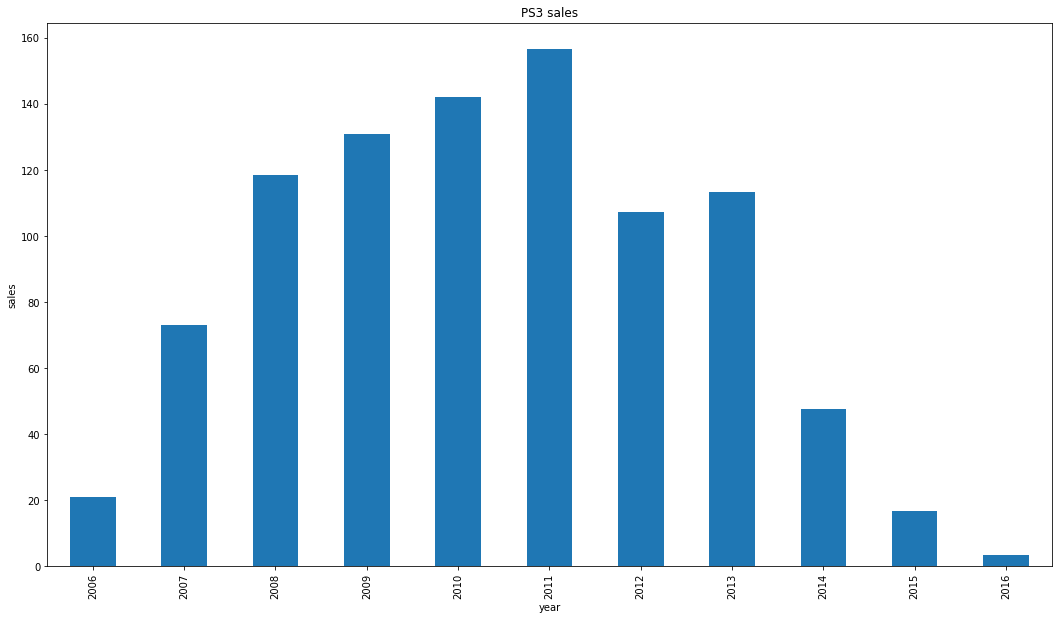

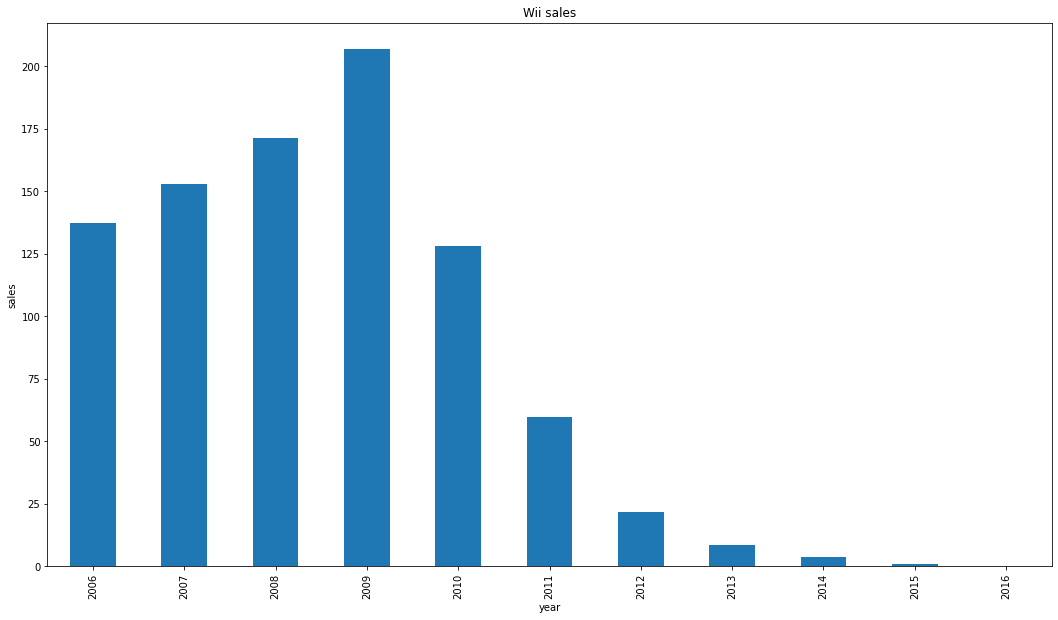

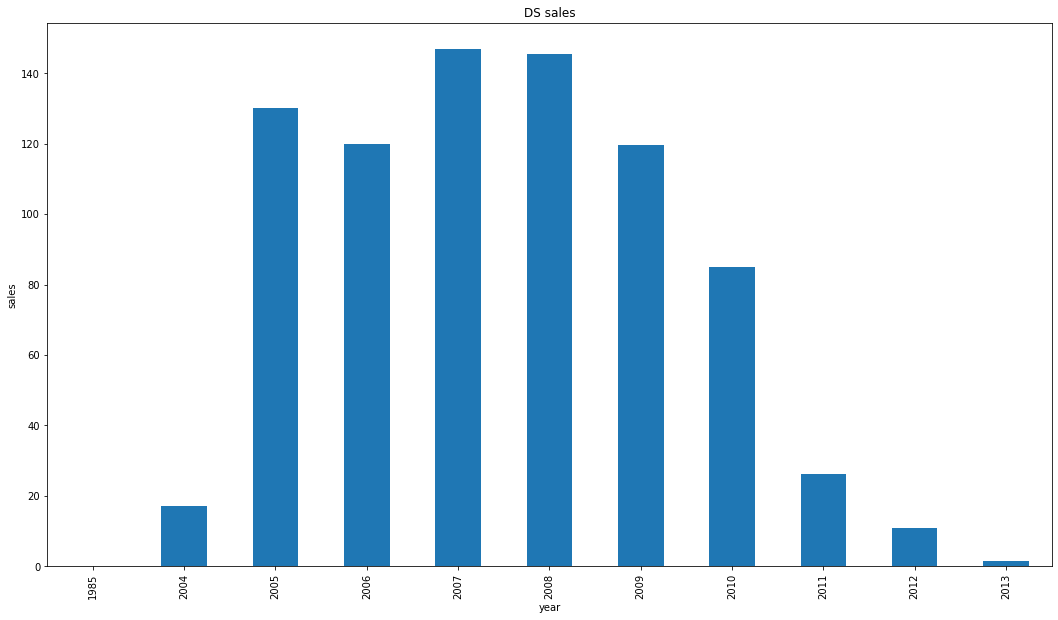

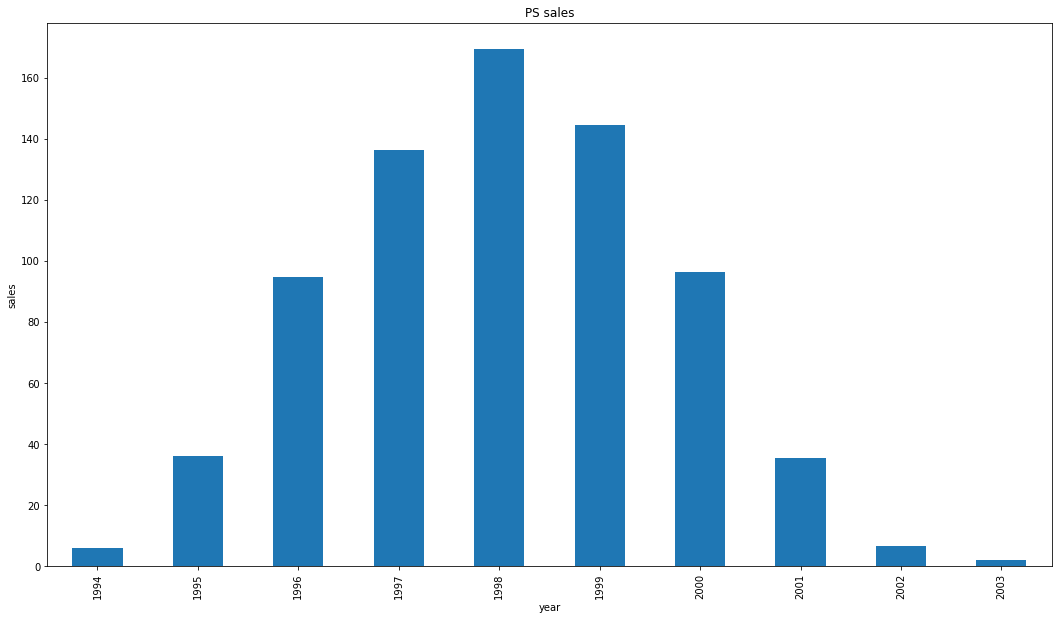

In [43]:
#top platforms

platform_sale_6 = platform_sale.head(6)


#looping through top 6 platform
for platforms in platform_sale_6.index: 
    
    #creates a slice of rows from game table for top platforms
    top_p=game.query('platform == @platforms')
    
    #groups the slice by year of release and sum the sales, and plot a bar plot
    top_p.groupby('year_of_release')['total_sale'].sum().plot(kind = 'bar', figsize=(18, 10))
    
    #plots
    plt.title('{} sales'.format(platforms))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

Interestingly, PS2 started in 2000 and increased popularity for the next couple years before phasing out after 2010. Xbox360 started in 2005, and increased popularity for the next decade, we see a dramatic decrease in 2016. PS3 came later in 2006, there is also a dramatic decrease in 2016. Wii started in 2006, and peaked in 2009. The sale gradually decrease starting from 2011, finally phasing out after 2014. DS starts early and maintained a steady sale until 2013. PS started in 1994, and phasing out after 2002. 

It appears that it usually takes a platform that used to be popular 7-10 years to fade out of the market. Take PS, PS2 and PS3 into consideration, PS appears in 1994, PS2 in 2000 and PS3 in 2006. The observation is that it takes 4-6 years for a new platform to appear and gradually replace the previous generation of console. 

In order to determine the relevancy of dat for our analysis for 2017, we should compare the top sales in all time vs various timepoints. Let's start with data since 2006 (-10 years), and compare it with data within the past 5 years (2011) to get a better idea on what to use and what to disregard.

### Sale since 2006

In [44]:
#create a slice

sale_since = game.query('year_of_release >= 2006')

sale_since_2006 = sale_since.groupby('platform')['total_sale'].sum().sort_values(ascending = False)

sale_since_2006

platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sale, dtype: float64

Xbox360 leads in sale since 2006, follow by PS3, Wii, DS , PS4. When we compare with the previous groups, we see that several platforms have moved to the top of the list. First is PS4, follow by 3DS, PSP, PC, XOne and WiiU. Now let's look at sales since 2011.

### Sales since 2011

In [45]:
#create a slice

sale_since_2011 = game.query('year_of_release >= 2011')

sale_since_2011_top = sale_since_2011.groupby('platform')['total_sale'].sum().sort_values(ascending = False)

sale_since_2011_top

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sale, dtype: float64

In this case, PS3 leads in total sales, follow by Xbox360, PS4, 3DS, XboxOne, PC. We can see a clear trend of what has become popular for the period of 2006-present and 2011-present. It appears that Wii and PS2 has really phased out, majority of sales were made during 2006-2011. For this reason, I have decided to use 2011-present data because it is most relevant.

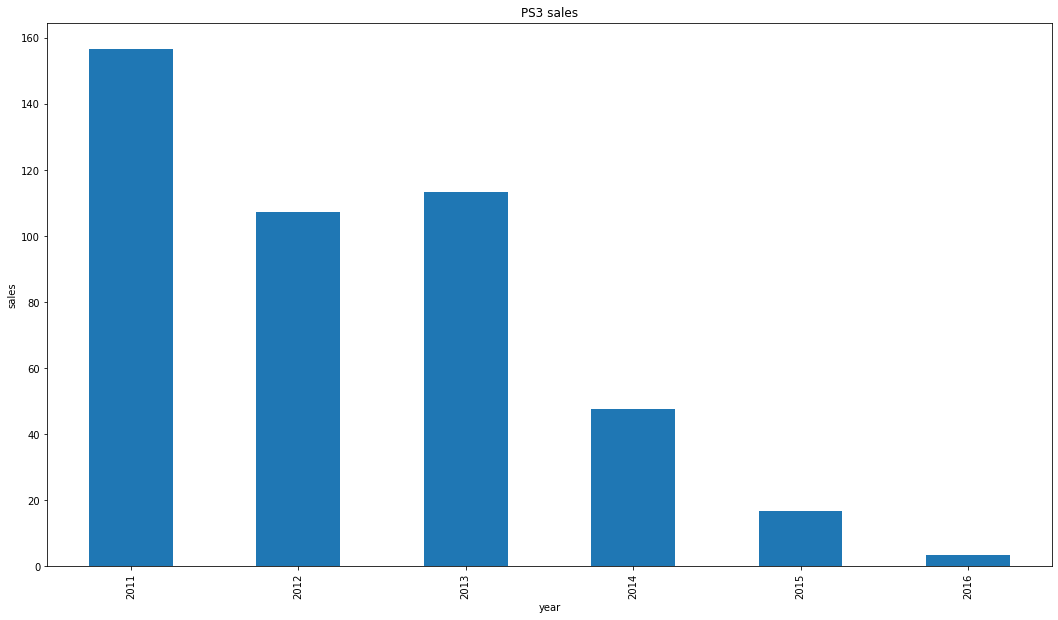

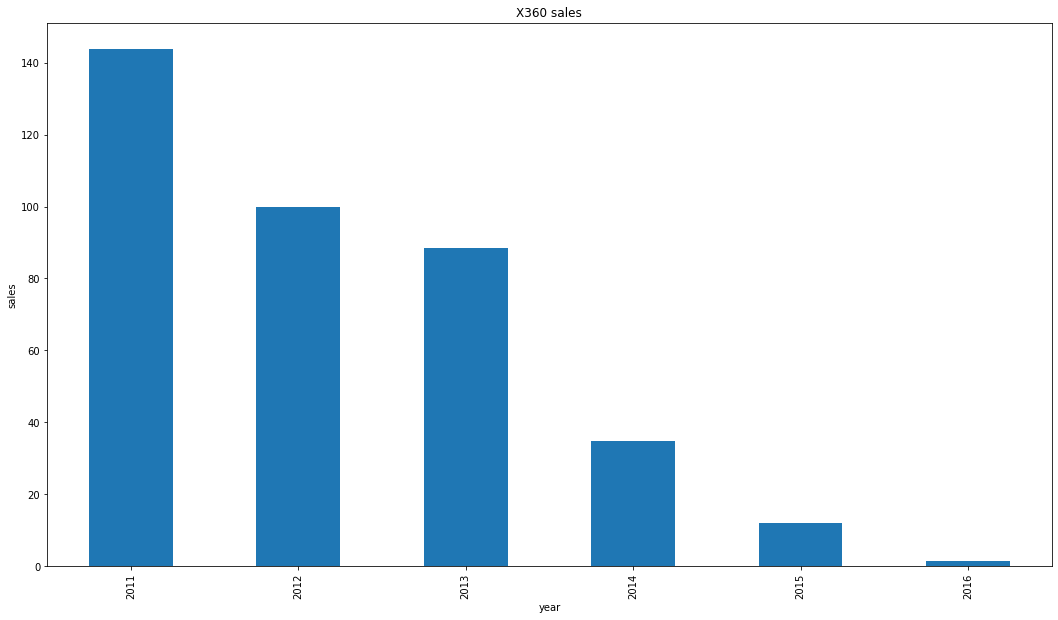

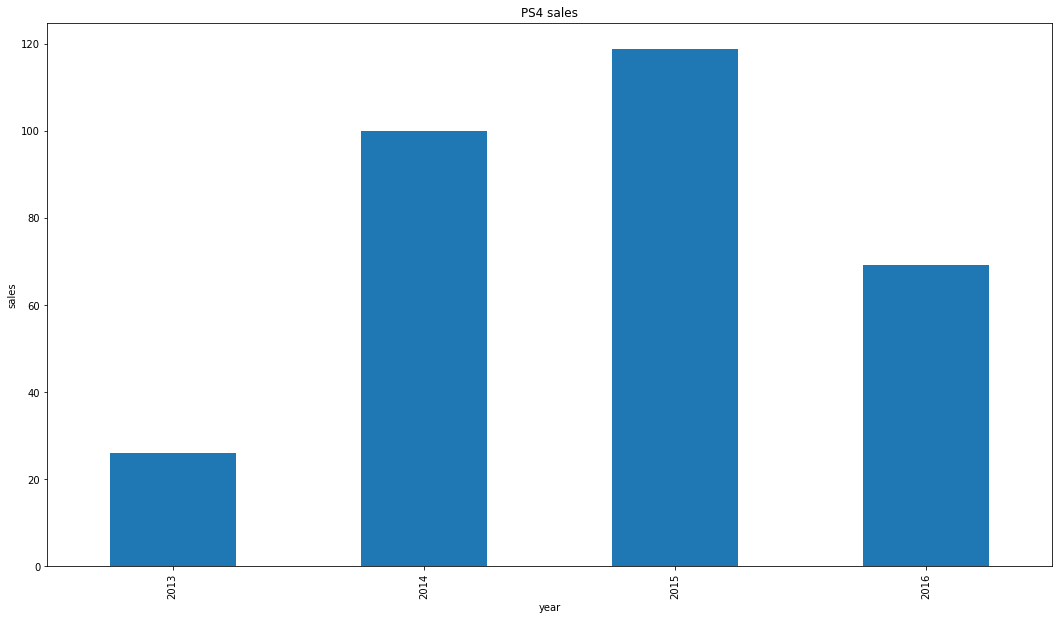

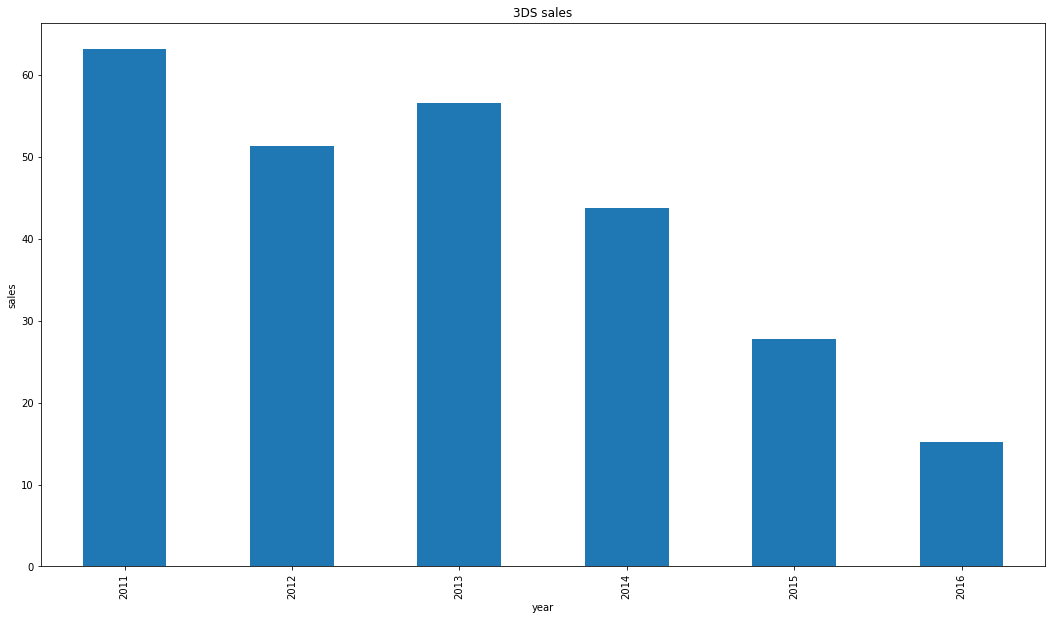

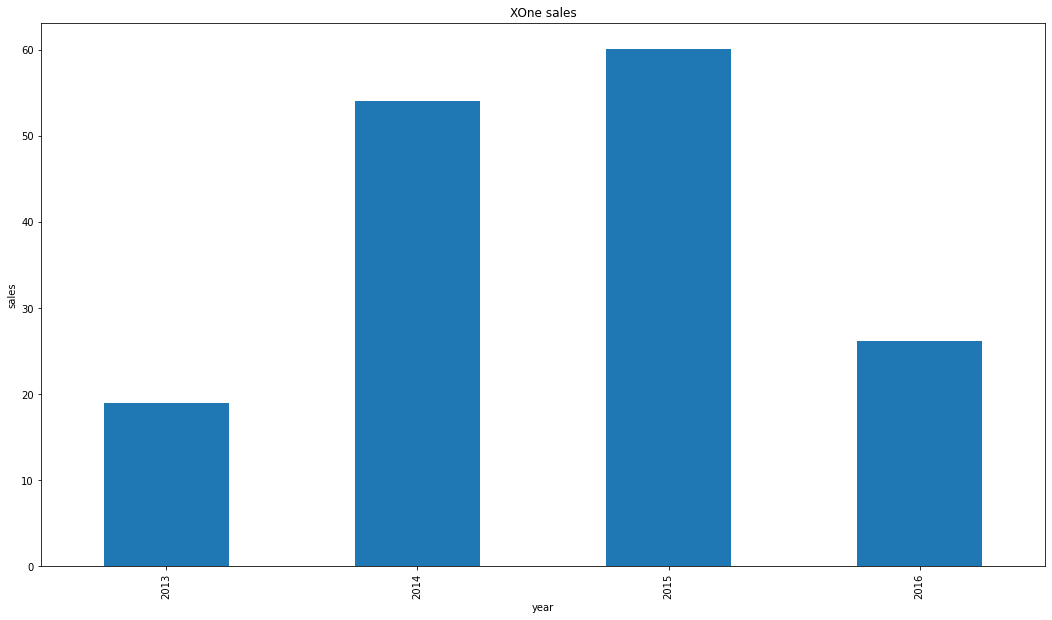

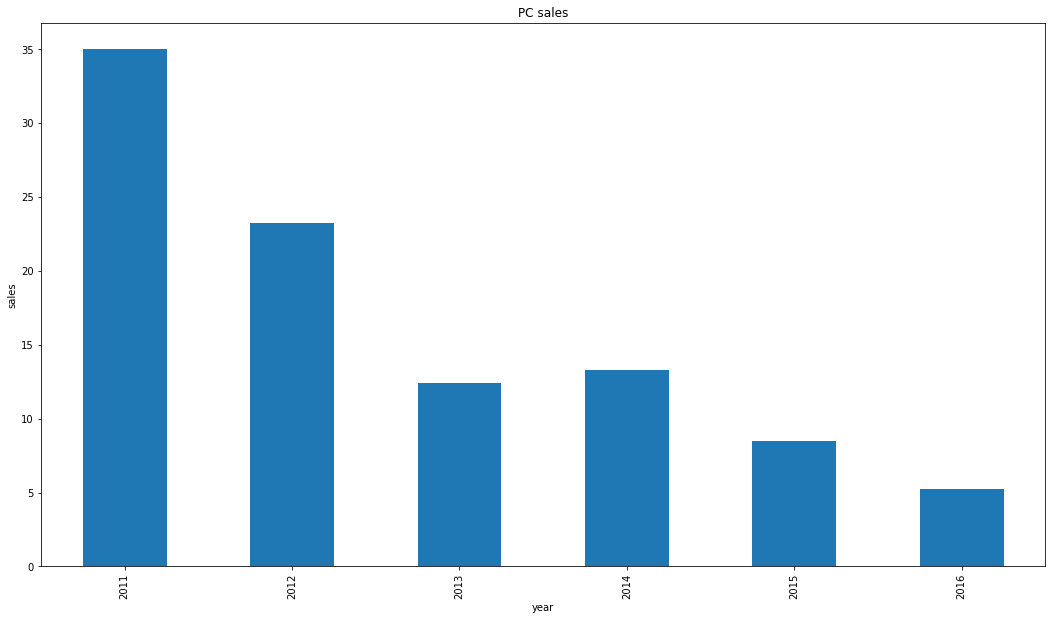

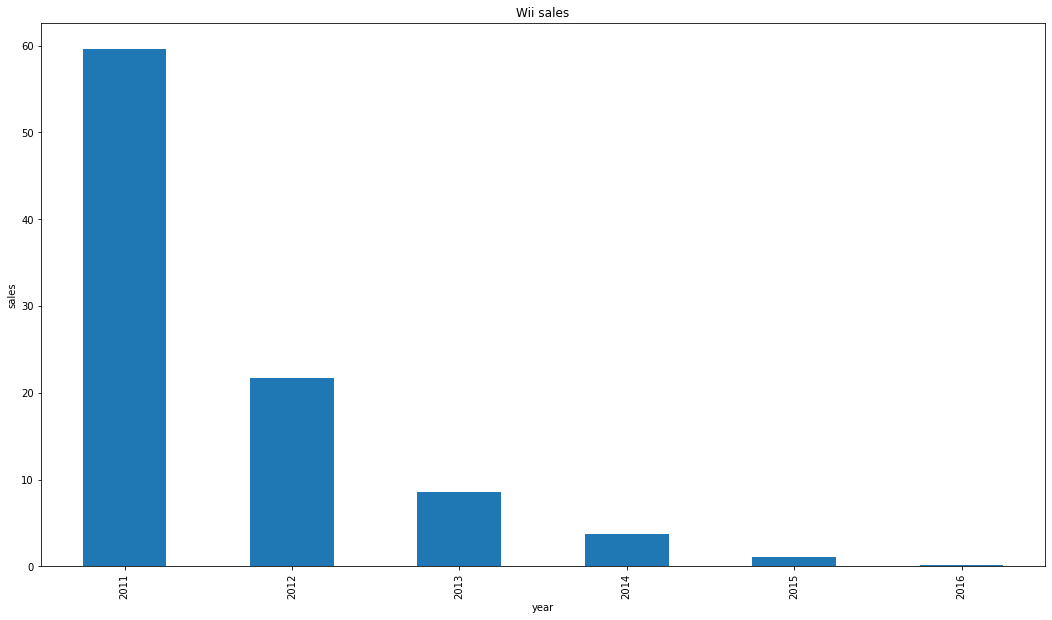

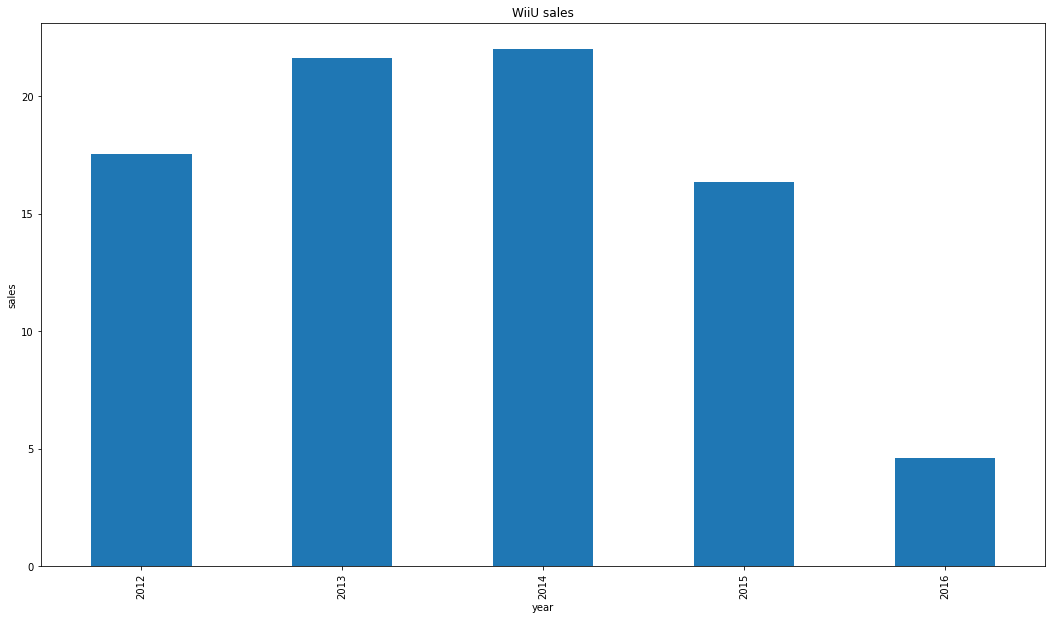

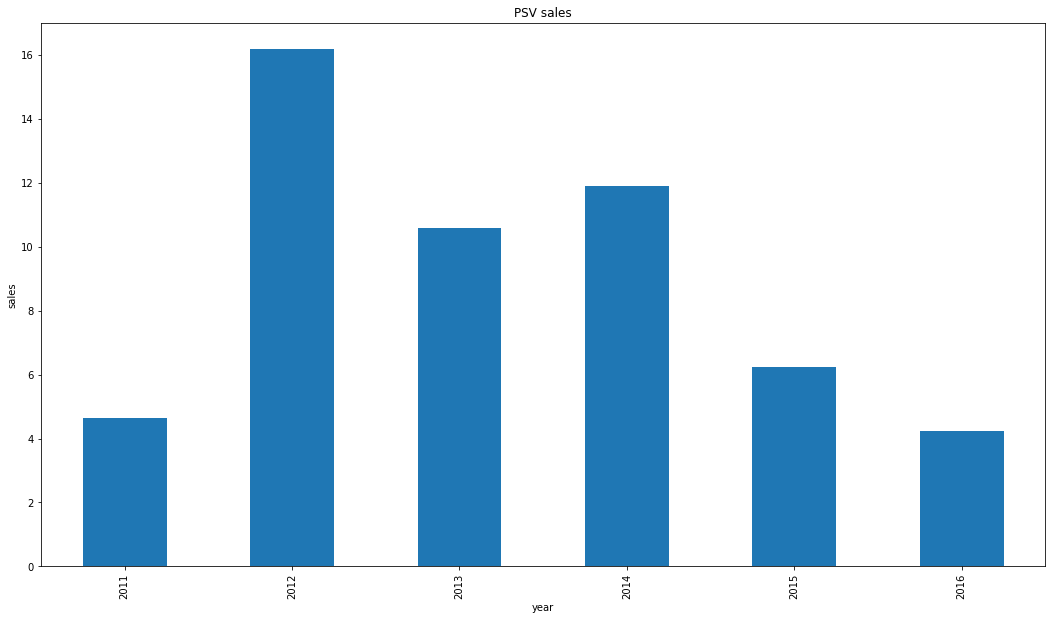

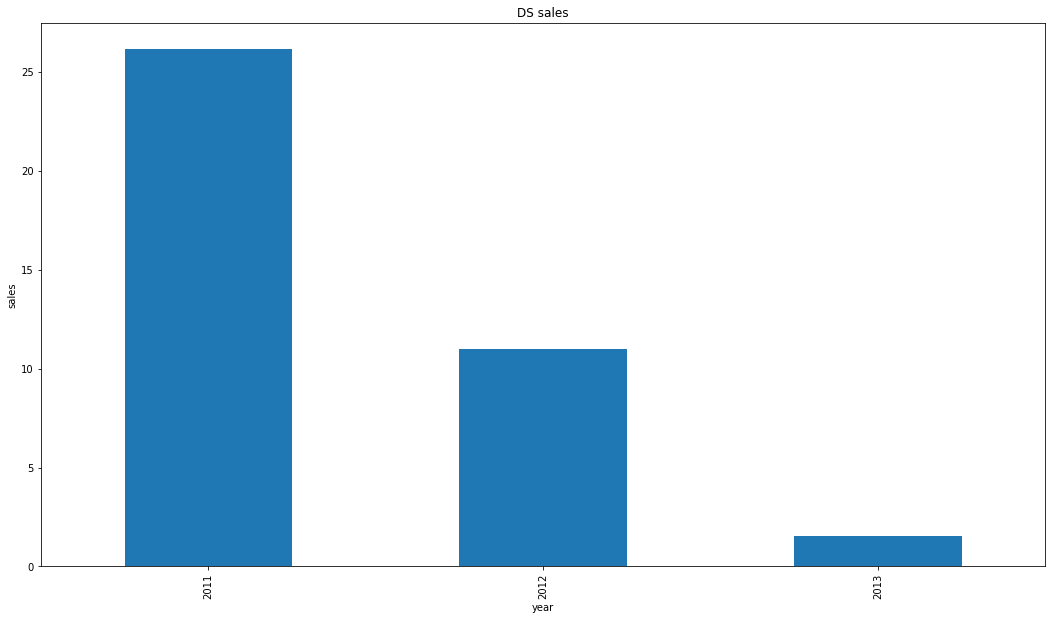

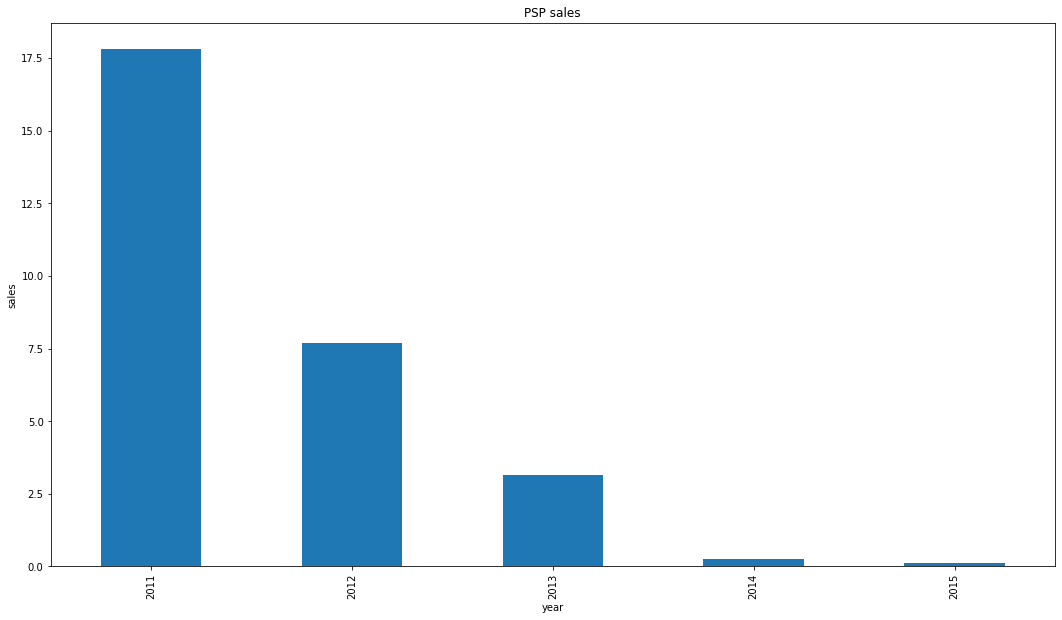

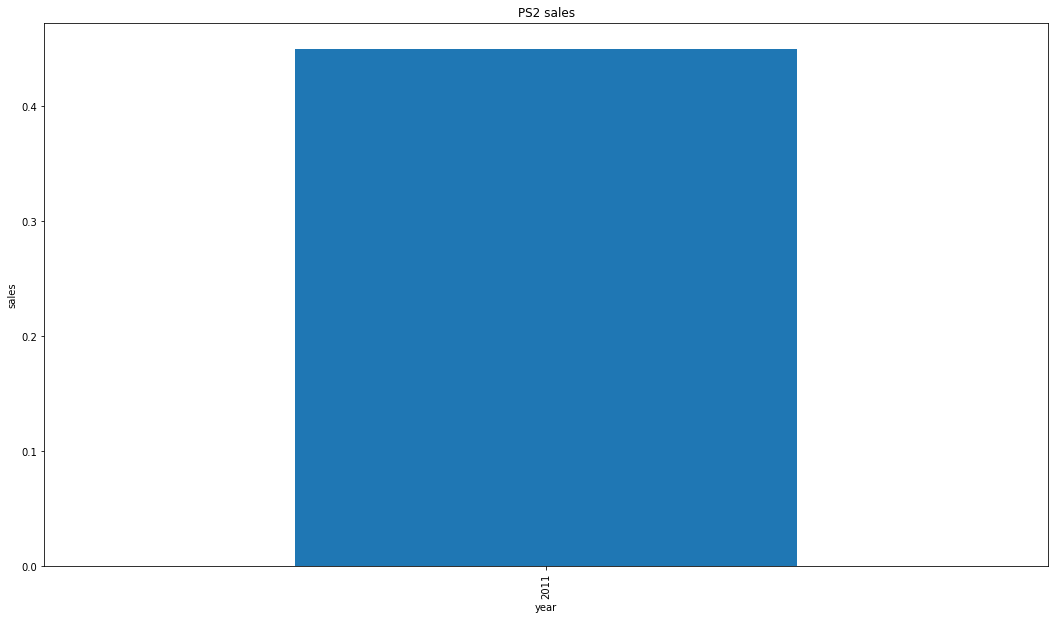

In [46]:
#looping through top 6 platform
for platforms in sale_since_2011_top.index: 
    
    #creates a slice of rows from game table for top platforms
    top_platform = sale_since_2011.query('platform == @platforms')
    
    #groups the slice by year of release and sum the sales, and plot a bar plot
    top_platform.groupby('year_of_release')['total_sale'].sum().plot(kind = 'bar', figsize=(18, 10))
    
    #plots
    plt.title('{} sales'.format(platforms))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

Here, based on the bar plots, we can easily differentiate the growing platforms from the shrinking ones. 
Since 2011:

**PS3**: Shrinking, almost phased out in 2016. Unlikely to be a profitable platform in 2017.

**Xbox360**: popular from 2011-2013, almost phased out in 2016. Unlikely to be profitable in 2017.

**PS4**: Started in 2013, sales steady. Likely to be profitable in 2017.

**3DS**: although sale have decreased in 2016, overall steady sale trend. More likely to be profitable in 2017 than non-profitable.

**XboxOne**: started in 2013, more sales in 2016 than its released year, sales steady. Likely to be profitable in 2017.

**PC**: Decreasing sales but overall steady sales. More likely to be profitable in 2017 than no-profit. 

**Wii**: Almost phased out in 2016. Unlikely to be profitable in 2017.

**WiiU**: Sale decreased in 2016, but overall steady sales. Therefore more likely to be profitable in 2017 than non-profitable.

**PSV**: similar to PC, likely to be profitable in 2017 than non-profitable. 

**DS**: No sale recorded past 2013. Non-profitable in 2017.

**PSP**: No sale recorded past 2015. Non-profitable in 2017.

**PS2**: No sale recorded past 2011. Non-profitable in 2017.

In conclusion, the potentially proftiable platforms for 2017 are PS4, XboxOne, PC, 3DS, WiiU and PSV. 

### Global sales of all games by platform

Next, we will look at the sales of all games based on the platforms that we have selected in the previous steps: PS4, XboxOne, PC, 3DS, WiiU and PSV. 

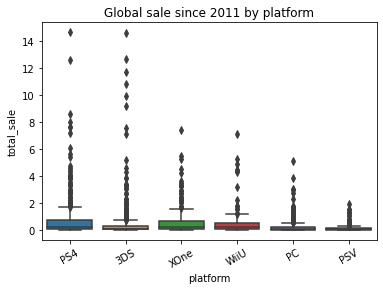

In [47]:
global_platforms = sale_since_2011.query('platform == "XOne" | platform == "PS4" | platform == "3DS" | platform == "WiiU" | platform == "PC" | platform == "PSV"')

ax = sns.boxplot(x='platform', y='total_sale', data=global_platforms)

ax.set_title('Global sale since 2011 by platform')

ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

sns.set(rc={'figure.figsize':(12,10)})

While there are no prominent difference observed in the median between PS4, XboxOne and WiiU, the median sale for 3DS, PC and PSV appeared to be lower. PS4 and 3DS has more outliers that falls beyond the upper limit, with highest one that is ~14.5 million. 

The initial observation is that **XboxOne** and **PS4** seems to be good platforms to release game on in 2017. Bar plot shows their sale in 2016 is recovering and box plot is showing that they have a higher median sale than other platforms. But we will focus on one platform in the next analysis, we will choose PS4.  

### User and professional reviews on sales

We will focus on PS4 platform and check if there is an association between user/professional reviews and total sales. 

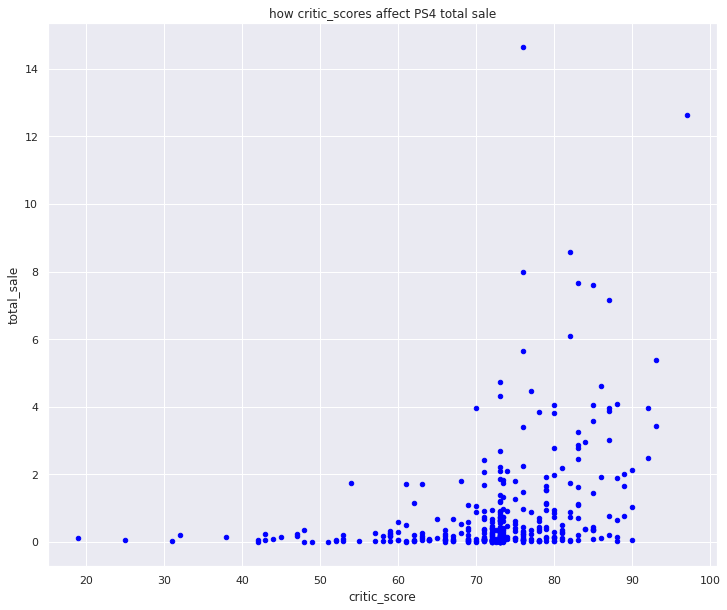

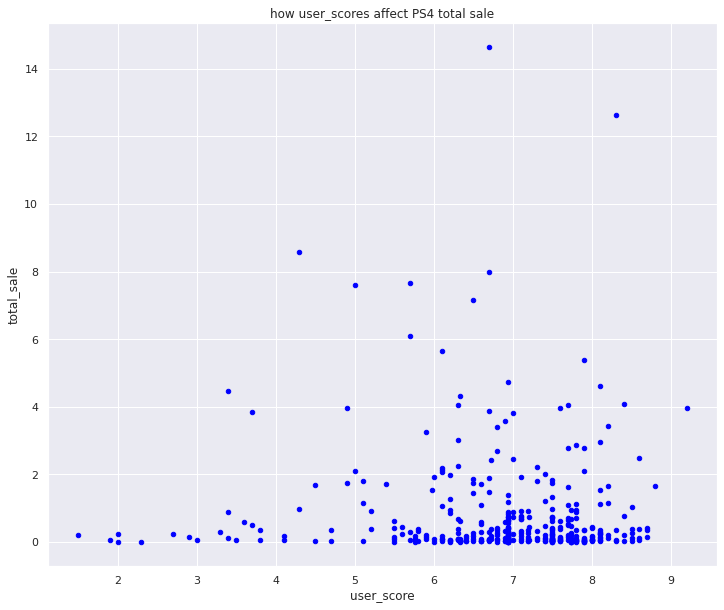

In [48]:
#create a slice with PS4 data

ps4_data = sale_since_2011.query('platform == "PS4"')

#write a loop for both reviews

cols = ['critic_score', 'user_score']

for column in cols:
    ps4_data.plot(x=column, y ='total_sale', kind = 'scatter', c='blue')
    plt.title('how {}s affect PS4 total sale'.format(column))
    plt.show()

From the graph, it seems there might be a positive correlation between both user/professional reviews and total sale. But we cannot be sure, so let's find the correlation coefficients. 

In [49]:
print('the correlation coefficient between critic scores and total sale is:', ps4_data['critic_score'].corr(ps4_data['total_sale']))

print('the correlation coefficient between user scores and total sale is:', ps4_data['user_score'].corr(ps4_data['total_sale']))

the correlation coefficient between critic scores and total sale is: 0.3347689328109687
the correlation coefficient between user scores and total sale is: -0.05366322650258684


It appears that there are little to no linear correlation between either critic scores or user scores and total sales. Sometimes higher ratings amount critics and users does not guarantee a bigger profit..

### Will a game does better on one platform than the other?

Since we had two choice of platforms (XboxOne and PS4) for our two profitable platforms, let's look at the games that are on both platforms and compare their sales. 

In [50]:
#create a slice with both xboxone and ps4

platform_game = sale_since_2011.query('platform == "PS4" | platform == "XOne"')

#Identify duplicates and sort by name

names_plat_game = platform_game['name']

duplicates_names = platform_game[names_plat_game.isin(names_plat_game[names_plat_game.duplicated()])].sort_values('name')

duplicates_names

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
9197,7 Days to Die,PS4,2016,Action,0.04,0.08,0.00,0.02,45.0,5.900000,M,0.14
12863,7 Days to Die,XOne,2016,Action,0.03,0.02,0.00,0.00,35.0,5.200000,M,0.05
12920,Adventure Time: Finn & Jake Investigations,XOne,2015,Action,0.03,0.02,0.00,0.00,74.0,6.708475,T,0.05
10893,Adventure Time: Finn & Jake Investigations,PS4,2015,Action,0.03,0.05,0.00,0.02,73.0,6.932955,T,0.10
14940,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,67.0,6.200000,T,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
9117,XCOM 2,PS4,2016,Strategy,0.04,0.08,0.00,0.02,88.0,8.000000,T,0.14
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,74.0,6.708475,T,0.01
12761,ZombiU,PS4,2016,Action,0.00,0.04,0.01,0.01,73.0,6.932955,T,0.06
7539,Zombie Army Trilogy,PS4,2015,Shooter,0.05,0.12,0.00,0.03,62.0,6.800000,M,0.20


In [51]:
#put everything into a table
duplicate_names_sales = duplicates_names.pivot_table(index = 'name', columns = 'platform', values = 'total_sale')

duplicate_names_sales

platform,PS4,XOne
name,,
7 Days to Die,0.14,0.05
Adventure Time: Finn & Jake Investigations,0.10,0.05
Agatha Christie's The ABC Murders,0.02,0.01
Alien: Isolation,1.12,0.50
Angry Birds Star Wars,0.22,0.17
...,...,...
Wolfenstein: The Old Blood,0.43,0.15
Worms: WMD,0.03,0.01
XCOM 2,0.14,0.04


Let's calculate the mean and median difference

In [52]:
sale_diff = duplicate_names_sales['PS4'] - duplicate_names_sales['XOne']

mean = sale_diff.mean()
median = sale_diff.median()

print('the mean difference between the sales on PS4 and XboxOne is:', mean *1000000)
print('the median difference between the sales on PS4 and XboxOne is:', median*1000000)

the mean difference between the sales on PS4 and XboxOne is: 585207.3732718894
the median difference between the sales on PS4 and XboxOne is: 210000.00000000003


It appears that games sold on PS4 averaging an approximate $585,207 more in total sales than on XboxOne. Which supports our decision of picking PS4 over XboxOne.

### Most profitable genre

Next, we will look at which genre appears to be the most profitable.

**Since 2011**

In [53]:
#groupby

genre_sale = sale_since_2011.groupby('genre')['total_sale'].sum().sort_values(ascending =False)

genre_sale

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sale, dtype: float64

Since 2011, the most profitable genre appeared to be Action, follow by shooter, role-playing and sports. Let's check the distribution.

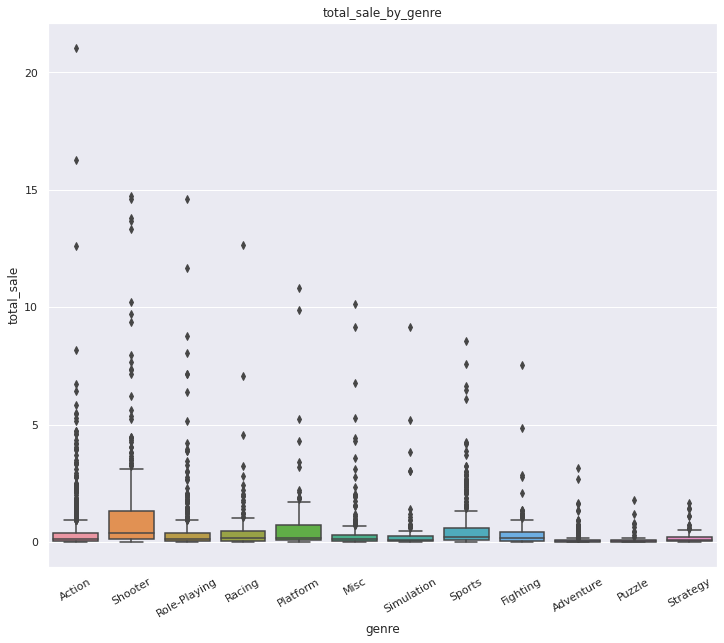

In [54]:
#boxplot
yx = sns.boxplot(x='genre', y='total_sale', data=sale_since_2011)

yx.set_title('total_sale_by_genre')

ticks = yx.set_xticklabels(yx.get_xticklabels(),rotation=30)



Although action appeared to have a higher total_sale, shooter has a higher median, follow by racing, sports and fighting. Let's look at the bar graph.

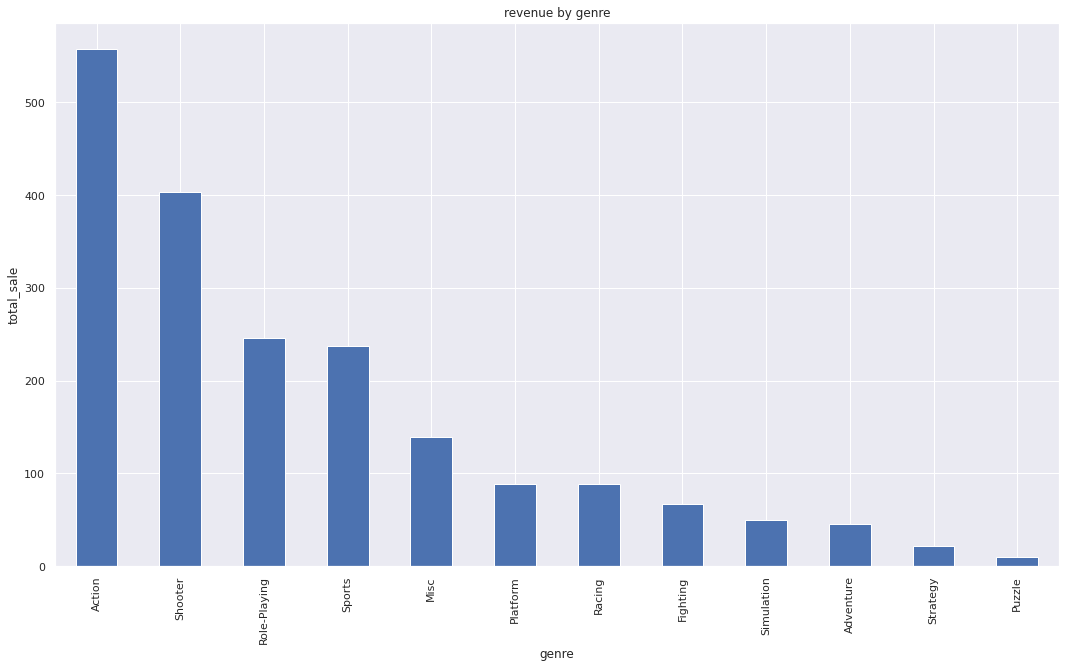

In [55]:
#bar plot

genre_sale.plot(kind = 'bar', figsize = (18,10))

plt.title('revenue by genre')
plt.xlabel('genre')
plt.ylabel('total_sale')
plt.show()

I believe that the most profitable genre for 2017 are potentially action, shooter, role playing and sports. 

## User profile based on region

### NA users

In [56]:
#find top 5 platform, genre and rating.

cols  = ['platform', 'genre', 'rating']

for column in cols:
    na_users = sale_since_2011.groupby(column)['na_sales'].sum().sort_values(ascending = False)
    
    print(na_users.head())

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64
rating
M       328.79
E       210.95
T       171.88
E10+    117.72
EC        0.42
Name: na_sales, dtype: float64


For NA users, the top 5 platform are X360, PS3, PS4, XOne, and 3DS. The top 5 genre are action, shooter, sport, role playing and miscellanous. While the rating are Mature, E for everyone, unkown (without ratings), Everyone 10+, Teen. 

### EU users

In [57]:
#Top 5 platform, genre and rating
cols  = ['platform', 'genre', 'rating']

for column in cols:
    eu_users = sale_since_2011.groupby(column)['eu_sales'].sum().sort_values(ascending = False)
    
    print(eu_users.head())

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64
rating
M       267.78
E       194.93
T       129.05
E10+     78.00
RP        0.03
Name: eu_sales, dtype: float64


For EU users, the top 5 platform are PS3, PS4, X360, 3DS, and PC. The top 5 genre are action, shooter, sport, role playing and racing. While the rating are Mature, E for everyone, Unknown(not rating), Teen, Everyone 10+. 

### JP users

In [58]:
#find top 5 platform, genre and rating.

cols  = ['platform', 'genre', 'rating']

for column in cols:
    jp_users = sale_since_2011.groupby(column)['jp_sales'].sum().sort_values(ascending = False)
    
    print(jp_users.head())

platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64
rating
T       134.34
E        72.76
M        27.32
E10+     11.23
EC        0.00
Name: jp_sales, dtype: float64


For JP users, the top 5 platform are 3DS, PS3, PSP, PSV, and PS4. The top 5 genre are role-playing, action, miscellnous, fighting and platform. While the rating are Unkown, E for everyone, Teen, Mature, Everyone 10+. 

**User profile by region conclusion**

It appears that NA users prefer consoles such as PS3, 4, Xbox, similar to EU users. While JP users prefer protable consoles such as 3DS and the playstation console series. In terms of genres, both NA and EU users favorite shooting, action, sports and role-playing. Whereas JP users prefers role-playing, action, miscellnous, fighting and platform. Both NA and EU players favorites Mature games following by E for everyone. JP users, since the ESRB system is created for western games, it is no surprise that JP users prefer games that are not made in the west, thus having unknown ratings. They also prefer E for everyone, then teen games. In general, EU and NA users shares a similar profile in terms of platform, genre and rating preferences. JP differs from the other two regions.  

## Test Statistical Hypotheses

- `The null hypothesis`: the average user ratings of the Xbox One and PC platforms is the same.
- `The alternative hypothesis`: the average user ratings of the Xbox One and PC platforms is not the same.

In [59]:
# create slices for Xbox One and PC

xone_data = sale_since_2011.query('platform == "XOne"')

pc_data = sale_since_2011.query('platform == "PC"')


#Levene's test
#set alpha
alpha = 0.05 

result = st.levene(xone_data['user_score'], pc_data['user_score'], center='mean')

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are most likely the same')
else:
    print('The variances are most likely not the same')
   

p-value: 0.00015634561980809922
The variances are most likely not the same


In [60]:
#set alpha

alpha = 0.05

#test
results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var =True)

print('p-value:', results.pvalue)

#hypothesis testing

if results.pvalue > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 0.8050807489161735
We fail to reject the null hypothesis


Based on our statstical analysis, we fail to reject he null hypothesis, thus: **the average user ratings of the Xbox One and PC platforms is the same.**

- `The null hypothesis`: The average user ratings for the Action and Sports genres is the same.
- `The alternative hypothesis`:The average user ratings for the Action and Sports genres is different.

In [61]:
# create a slice for action and sports genre

action_data = sale_since_2011.query('genre == "Action"')

sports_data = sale_since_2011.query('genre == "Sports"')


#Levene's test
#set alpha
alpha = 0.05 

result = st.levene(action_data['user_score'], sports_data['user_score'], center='mean')

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are most likely the same')
else:
    print('The variances are most likely not the same')
   

p-value: 3.58315130974606e-17
The variances are most likely not the same


In [62]:
#set alpha

alpha = 0.05

#test
results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)

print('p-value:', results.pvalue)

#hypothesis testing

if results.pvalue > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 8.018544662580917e-28
We reject the null hypothesis


Based on our statistical analysis, we reject the null hypothesis, thus: **The average user ratings for the Action and Sports genres is not the same.**

## Conclusion

In this project, we first successfully made all column names lowercase, changed the datatype, filled all missing values based on appropriate factors and added a new column that indicates the total sale of a game. 

In the subsequent analysis steps, we have investigated our data on various aspects. 
We looked at the distribution of games released by year, where we found that the peak of video game industry really starts in 2002, where > 800 games gets released and continues to rise before stabilizes in 2012. 

We saw that it usually takes a platform that used to be popular 7-10 years to fade out of the market. And 4-6 years for a new platform to appear and gradually replace the previous generation of console.

We then determined that the potentially proftiable platforms for 2017 are PS4, XboxOne, PC, 3DS, WiiU and PSV. Based on our filtered data (game sale since 2011). Where PS4 and Xbox One are two most promising platforms. We proceed with PS4 because it appears that games sold on PS4 averaging an approximate $585,207 more in total sales than on XboxOne.

We tested wether user/professional ratings have an effect on total revenue, and there are little to no linear correlation between either critic scores or user scores and total sales. Sometimes higher ratings amount critics and users does not guarantee a bigger profit..

Based on our analysis, we believe that the most profitable genre for 2017 are potentially action, shooter, role playing and sports. 

The user_profile by region suggested that EU and NA users shares a similar profile in terms of platform, genre and rating preferences. Where JP users differs from the other two regions.  

Finally, with 95% confidence, we can conclude that "The average user ratings for the Action and Sports genres is the same" and "the average user ratings of the Xbox One and PC platforms is the same." And this is potentially due to large portion of the data were missing and we had to fill with extreme values. 



In [63]:
pd.pivot_table(game, values='rating', index=['name', 'platform'], aggfunc='first')

rating
name                         platform       
 Beyblade Burst              3DS           T
 Fire Emblem Fates           3DS           T
 Frozen: Olaf's Quest        3DS           E
                             DS            E
 Haikyu!! Cross Team Match!  3DS           E
...                                      ...
thinkSMART: Chess for Kids   DS            E
uDraw Studio                 Wii           E
uDraw Studio: Instant Artist Wii           E
                             X360          E
¡Shin Chan Flipa en colores! DS            E

[16441 rows x 1 columns]